In [1]:
# Cargar librerías
import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
Osa_df= pd.read_csv("Osa_df.csv")

In [3]:
# Verificar valores nulos
Osa_df.isnull().sum(axis= 1)

0        0
1        0
2        0
3        0
4        0
        ..
35152    0
35153    0
35154    0
35155    0
35156    0
Length: 35157, dtype: int64

In [4]:
Osa_df.dtypes

Id_Prod_2            int64
Año_Compra           int64
Mes_Compra           int64
Costo_Compra       float64
Fecha               object
Nombre_Prod         object
Tipo_Prod           object
Proveedor           object
Categoria_Prod      object
Cant_Prod_Venta    float64
Precio_Prod        float64
Año_Venta            int64
Mes_Venta            int64
dtype: object

In [5]:
# se localizan casillas con variable "error" en la columna Categoria_prod identificadas previamente
categoria_error=Osa_df.loc[Osa_df["Categoria_Prod"] == "Error"]
categoria_error

,Id_Prod_2,Año_Compra,Mes_Compra,Costo_Compra,Fecha,Nombre_Prod,Tipo_Prod,Proveedor,Categoria_Prod,Cant_Prod_Venta,Precio_Prod,Año_Venta,Mes_Venta
4171,4311,2021,3,5.40,2021-03,Trucha a la soriana. Dos raciones 300-400gr,Convencional,(ALMAZÁN PESCADOS Y MARISCOS) MANUEL ALMAZÁN OTEO,Error,7.0,7.40,2021,3
4172,4312,2021,3,5.25,2021-03,Trucha al natural. Dos raciones 300-400gr,Convencional,(ALMAZÁN PESCADOS Y MARISCOS) MANUEL ALMAZÁN OTEO,Error,4.0,7.20,2021,3
4173,4313,2021,3,5.90,2021-03,Bacalao con piquillo. Dos raciones 350-400gr,Convencional,(ALMAZÁN PESCADOS Y MARISCOS) MANUEL ALMAZÁN OTEO,Error,10.0,8.10,2021,3
4174,4314,2021,3,6.65,2021-03,Lubina con langostino. 330gr,Convencional,(ALMAZÁN PESCADOS Y MARISCOS) MANUEL ALMAZÁN OTEO,Error,8.0,9.15,2021,3


In [6]:
#### ASIGNAREMOS EL DATAFRAME DF_OSA A OSA_CATEGO_SUBCATEGO PARA ANALIZAR POR CATEGORIAS y SUBACATEGORIAS
# Estos gráficos lo realizaremos en secciones más abajo
df_catego_subcatego=Osa_df
df_catego_subcatego

,Id_Prod_2,Año_Compra,Mes_Compra,Costo_Compra,Fecha,Nombre_Prod,Tipo_Prod,Proveedor,Categoria_Prod,Cant_Prod_Venta,Precio_Prod,Año_Venta,Mes_Venta
0,9,2021,1,5.43,2021-01,Aceite coco Maya gold 450 ml,Eco,(GUMENDI) GUMIEL Y MENDIA S.L.,"Seco Envasado / Aceites, aliños y condimentos ...",0.000,0.00,2021,1
1,13,2021,1,2.91,2021-01,Aceite de girasol Virgen bio Franciscanos 1 L,Eco,(PIDEBIO) PLATAFORMA IBERICA DISTRIBUCION ECOL...,"Seco Envasado / Aceites, aliños y condimentos ...",0.000,0.00,2021,1
2,18,2021,1,12.94,2021-01,Aceite oliva virgen extra Umbria Oretana 2.5 L,Eco,(LA LABRANZA TOLEDANA) LA LABRANZA TOLEDANA S.L.,"Seco Envasado / Aceites, aliños y condimentos ...",9.000,18.50,2021,1
3,20,2021,1,22.95,2021-01,Aceite oliva virgen extra Umbria oretana 5 L,Eco,(LA LABRANZA TOLEDANA) LA LABRANZA TOLEDANA S.L.,"Seco Envasado / Aceites, aliños y condimentos ...",5.000,32.75,2021,1
4,23,2021,1,15.58,2021-01,Aceite rosa mosqueta y damáscena Piel sana 50 ml,Eco,(PIELSANA) PIELSANA S.COOP.MAD.,"Droguería, Perfumería, Limpieza, Higiene, Hoga...",1.000,26.20,2021,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35152,6502,2022,12,11.01,2022-12,Pularda deshuesada Sanchonar aprox 3 kg,False,(SANCHONAR) SANCHONAR S.L.,Resto Producto Fresco / Carnes frescas / Aves,7.095,15.10,2022,12
35153,6508,2022,12,13.96,2022-12,Pack Veer 8 botellas 33cl,Eco,(VEER) MISSON S.COOP.CYL.,"Seco Envasado / Vinos, cervezas, sidras / Cerv...",1.000,21.95,2022,12
35154,6511,2022,12,2.23,2022-12,Láminas lasagña de sémola Castagno 500 g,Eco,(GUMENDI) GUMIEL Y MENDIA S.L.,"Seco Envasado / Arroces, pastas, sémolas y leg...",2.000,3.35,2022,12
35155,6515,2022,12,2.06,2022-12,Yogur de avena natural Alpro 500 gr,Convencional,"(GM FOOD) TRANSGOURMET IBERICA, S.A.U.","Resto Producto Fresco / Leche, zumos, producto...",1.000,2.85,2022,12


In [7]:
# se recategorizan los campos de categoria_prod que tenian el vale "Error" ya que al revisarlos manualmente se nota que se pueden incluir en la categoría `Resto producto Fresco'
Osa_df['Categoria_Prod'] = np.where((Osa_df.Categoria_Prod == "Error"), 'Resto Producto Fresco / Pescados y mariscos / Pescado fresco', Osa_df.Categoria_Prod)
Osa_df.Categoria_Prod.unique().tolist()

['Seco Envasado / Aceites, aliños y condimentos / Aceites',
 'Droguería, Perfumería, Limpieza, Higiene, Hogar / Parafarmacia y cosmética / Cuidado de la piel',
 'Seco Envasado / Encurtidos y aperitivos / Olivas y encurtidos',
 'Fruta y Verdura / Verdura / Verdura de cocinar',
 'Seco Envasado / Cafés e infusiones / Cafés y cacaos',
 'Fruta y Verdura / Fruta / Fruta de hueso',
 'Resto Producto Fresco / Carnes frescas / Cerdo',
 'Seco Envasado / Salsas / Salsas',
 'Seco Envasado / Conserva vegetal / Conserva vegetal',
 'Seco Envasado / Encurtidos y aperitivos / Frutos secos',
 'Seco Envasado / Caldo, cremas, plato preparado, conserva / Conserva de pescado',
 'Seco Envasado / Arroces, pastas, sémolas y legumbres / Arroces',
 'Resto Producto Fresco / Charcutería animal / Embutidos',
 'Seco Envasado / Desayunos y merienda / Tortitas y barritas',
 'Resto Producto Fresco / Leche, zumos, productos lácteos / Yogures y postres',
 'Seco Envasado / Zumos, leche y bebidas vegetales / Bebidas vegetal

In [8]:
# se identifican en la columna Tipo_prod 470 valores con False
Osa_df['Tipo_Prod'].value_counts()

Eco             24142
Convencional    10545
False             470
Name: Tipo_Prod, dtype: int64

In [9]:
#se recategorizan los campos incluyendolos en producto convencional 
Osa_df['Tipo_Prod'] = np.where((Osa_df.Tipo_Prod == 'False'), 'Convencional', Osa_df.Tipo_Prod)
Osa_df['Tipo_Prod'].value_counts()

Eco             24142
Convencional    11015
Name: Tipo_Prod, dtype: int64

In [10]:
#creamos una columna Categoría_principal para agrupar los datos en 6 categorias 

def tomar_primera_palabra(cadena):
    return cadena.split(' ')[0]

# aplica la función a la columna "Categoria_producto" del DataFrame
nueva_columna = Osa_df['Categoria_Prod'].apply(tomar_primera_palabra)

# asigna los valores de la nueva columna a la columna "categoria_principal" del DataFrame
Osa_df['Categoria_Principal'] = nueva_columna
Osa_df.head(5)

,Id_Prod_2,Año_Compra,Mes_Compra,Costo_Compra,Fecha,Nombre_Prod,Tipo_Prod,Proveedor,Categoria_Prod,Cant_Prod_Venta,Precio_Prod,Año_Venta,Mes_Venta,Categoria_Principal
0,9,2021,1,5.43,2021-01,Aceite coco Maya gold 450 ml,Eco,(GUMENDI) GUMIEL Y MENDIA S.L.,"Seco Envasado / Aceites, aliños y condimentos ...",0.0,0.00,2021,1,Seco
1,13,2021,1,2.91,2021-01,Aceite de girasol Virgen bio Franciscanos 1 L,Eco,(PIDEBIO) PLATAFORMA IBERICA DISTRIBUCION ECOL...,"Seco Envasado / Aceites, aliños y condimentos ...",0.0,0.00,2021,1,Seco
2,18,2021,1,12.94,2021-01,Aceite oliva virgen extra Umbria Oretana 2.5 L,Eco,(LA LABRANZA TOLEDANA) LA LABRANZA TOLEDANA S.L.,"Seco Envasado / Aceites, aliños y condimentos ...",9.0,18.50,2021,1,Seco
3,20,2021,1,22.95,2021-01,Aceite oliva virgen extra Umbria oretana 5 L,Eco,(LA LABRANZA TOLEDANA) LA LABRANZA TOLEDANA S.L.,"Seco Envasado / Aceites, aliños y condimentos ...",5.0,32.75,2021,1,Seco
4,23,2021,1,15.58,2021-01,Aceite rosa mosqueta y damáscena Piel sana 50 ml,Eco,(PIELSANA) PIELSANA S.COOP.MAD.,"Droguería, Perfumería, Limpieza, Higiene, Hoga...",1.0,26.20,2021,1,"Droguería,"


In [11]:
Osa_df.columns.values

array(['Id_Prod_2', 'Año_Compra', 'Mes_Compra', 'Costo_Compra', 'Fecha',
       'Nombre_Prod', 'Tipo_Prod', 'Proveedor', 'Categoria_Prod',
       'Cant_Prod_Venta', 'Precio_Prod', 'Año_Venta', 'Mes_Venta',
       'Categoria_Principal'], dtype=object)

### ANALISIS DE LA INFLACIÓN 

In [12]:
Variacion_Compra = Osa_df.pivot_table(index='Nombre_Prod',columns=('Año_Compra'),values='Costo_Compra', aggfunc='mean')
Variacion_Compra

Año_Compra,2021,2022
Nombre_Prod,,
Abrillantador Finish 500 ml,3.420000,3.570000
Abrillantador lavavajillas Ecodoo 500 ml,2.355000,2.430000
Aceite caléndula y almendras Piel sana 100 ml,7.440000,NaN
Aceite capilar reparación y cuidado espino amarillo Logona 75 ml,8.560000,8.560000
Aceite coco Maya gold 250 ml,3.580000,3.580000
...,...,...
patata roja AgroEc.,1.114000,0.990000
proteina de guisante texturizada Vegetalia 250g,NaN,2.240000
tomate seco unidad AgroEc,1.614083,1.718125


In [13]:
Variacion_Compra.loc['Tomate cherry']

Año_Compra
2021    3.000099
2022    3.014682
Name: Tomate cherry, dtype: float64

In [14]:
Osa_df['Nombre_Prod'].value_counts()

Tomate cherry                                                           24
Champiñon portobello                                                    24
Pan molde natural 100% Bimbo 460 gr                                     24
Pan molde estilo artesano Bimbo 550 gr                                  24
Seta shitake                                                            24
                                                                        ..
Set bebé de bioplástico blanco Biodora                                   1
Gel lubricante de masaje Té Verde compatible con preservativo 150 mL     1
Preservativo Sensitive dry Fair squared 10 uds                           1
Pinza de la ropa acero inoxidable Pincinox 12 uds                        1
Yogur vegetal con arandanos Alpro 500 gr                                 1
Name: Nombre_Prod, Length: 4373, dtype: int64

In [15]:
Variacion_Venta = Osa_df.pivot_table(index='Nombre_Prod',columns= str('Año_Venta'),values='Precio_Prod', aggfunc='mean')
Variacion_Venta

Año_Venta,2021,2022
Nombre_Prod,,
Abrillantador Finish 500 ml,4.250000,6.050000
Abrillantador lavavajillas Ecodoo 500 ml,4.550000,4.962500
Aceite caléndula y almendras Piel sana 100 ml,0.000000,NaN
Aceite capilar reparación y cuidado espino amarillo Logona 75 ml,14.400000,0.000000
Aceite coco Maya gold 250 ml,3.566667,5.350000
...,...,...
patata roja AgroEc.,1.210000,1.400000
proteina de guisante texturizada Vegetalia 250g,NaN,3.150000
tomate seco unidad AgroEc,2.355909,2.441117


In [16]:
Var_Cant_Venta = Osa_df.pivot_table(index='Nombre_Prod',columns= str('Año_Venta'),values='Cant_Prod_Venta', aggfunc='sum')
Var_Cant_Venta

Año_Venta,2021,2022
Nombre_Prod,,
Abrillantador Finish 500 ml,2.000,1.00
Abrillantador lavavajillas Ecodoo 500 ml,5.000,4.00
Aceite caléndula y almendras Piel sana 100 ml,0.000,NaN
Aceite capilar reparación y cuidado espino amarillo Logona 75 ml,4.000,0.00
Aceite coco Maya gold 250 ml,3.000,6.00
...,...,...
patata roja AgroEc.,126.296,25.53
proteina de guisante texturizada Vegetalia 250g,NaN,11.00
tomate seco unidad AgroEc,40.000,82.00


In [17]:
Variacion_Compra.isnull().sum()

Año_Compra
2021    664
2022    828
dtype: int64

In [18]:
Variacion_Venta.isnull().sum()

Año_Venta
2021    664
2022    828
dtype: int64

In [19]:
Var_Cant_Venta.isnull().sum()

Año_Venta
2021    664
2022    828
dtype: int64

In [20]:
df_merged = pd.merge(Variacion_Compra, Var_Cant_Venta, on='Nombre_Prod')
df_merged

,2021_x,2022_x,2021_y,2022_y
Nombre_Prod,,,,
Abrillantador Finish 500 ml,3.420000,3.570000,2.000,1.00
Abrillantador lavavajillas Ecodoo 500 ml,2.355000,2.430000,5.000,4.00
Aceite caléndula y almendras Piel sana 100 ml,7.440000,NaN,0.000,NaN
Aceite capilar reparación y cuidado espino amarillo Logona 75 ml,8.560000,8.560000,4.000,0.00
Aceite coco Maya gold 250 ml,3.580000,3.580000,3.000,6.00
...,...,...,...,...
patata roja AgroEc.,1.114000,0.990000,126.296,25.53
proteina de guisante texturizada Vegetalia 250g,NaN,2.240000,NaN,11.00
tomate seco unidad AgroEc,1.614083,1.718125,40.000,82.00


In [21]:
Osa_Compras_Vs_Cv = df_merged.rename(columns={
    '2021_x': 'Costo_2021',
    '2022_x': 'Costo_2022',
    '2021_y': 'Cant_V_2021',
    '2022_y': 'Cant_V_2022'})
Osa_Compras_Vs_Cv 

,Costo_2021,Costo_2022,Cant_V_2021,Cant_V_2022
Nombre_Prod,,,,
Abrillantador Finish 500 ml,3.420000,3.570000,2.000,1.00
Abrillantador lavavajillas Ecodoo 500 ml,2.355000,2.430000,5.000,4.00
Aceite caléndula y almendras Piel sana 100 ml,7.440000,NaN,0.000,NaN
Aceite capilar reparación y cuidado espino amarillo Logona 75 ml,8.560000,8.560000,4.000,0.00
Aceite coco Maya gold 250 ml,3.580000,3.580000,3.000,6.00
...,...,...,...,...
patata roja AgroEc.,1.114000,0.990000,126.296,25.53
proteina de guisante texturizada Vegetalia 250g,NaN,2.240000,NaN,11.00
tomate seco unidad AgroEc,1.614083,1.718125,40.000,82.00


In [22]:
#creamos la columna Variación Compras

Osa_Compras_Vs_Cv['variacion_compras']=Osa_Compras_Vs_Cv['Costo_2022'] - Osa_Compras_Vs_Cv['Costo_2021']
Osa_Compras_Vs_Cv

,Costo_2021,Costo_2022,Cant_V_2021,Cant_V_2022,variacion_compras
Nombre_Prod,,,,,
Abrillantador Finish 500 ml,3.420000,3.570000,2.000,1.00,0.150000
Abrillantador lavavajillas Ecodoo 500 ml,2.355000,2.430000,5.000,4.00,0.075000
Aceite caléndula y almendras Piel sana 100 ml,7.440000,NaN,0.000,NaN,NaN
Aceite capilar reparación y cuidado espino amarillo Logona 75 ml,8.560000,8.560000,4.000,0.00,0.000000
Aceite coco Maya gold 250 ml,3.580000,3.580000,3.000,6.00,0.000000
...,...,...,...,...,...
patata roja AgroEc.,1.114000,0.990000,126.296,25.53,-0.124000
proteina de guisante texturizada Vegetalia 250g,NaN,2.240000,NaN,11.00,NaN
tomate seco unidad AgroEc,1.614083,1.718125,40.000,82.00,0.104042


In [23]:
# Eliminamos valores Nulos
Osa_Compras_Vs_Cv = Osa_Compras_Vs_Cv.dropna()
Osa_Compras_Vs_Cv

,Costo_2021,Costo_2022,Cant_V_2021,Cant_V_2022,variacion_compras
Nombre_Prod,,,,,
Abrillantador Finish 500 ml,3.420000,3.570000,2.000,1.00,0.150000
Abrillantador lavavajillas Ecodoo 500 ml,2.355000,2.430000,5.000,4.00,0.075000
Aceite capilar reparación y cuidado espino amarillo Logona 75 ml,8.560000,8.560000,4.000,0.00,0.000000
Aceite coco Maya gold 250 ml,3.580000,3.580000,3.000,6.00,0.000000
Aceite coco Maya gold 450 ml,5.366000,5.350000,10.000,16.00,-0.016000
...,...,...,...,...,...
bandeja Mora gumendi 125g,2.162000,2.141000,90.000,40.00,-0.021000
patata roja AgroEc.,1.114000,0.990000,126.296,25.53,-0.124000
tomate seco unidad AgroEc,1.614083,1.718125,40.000,82.00,0.104042


In [24]:
#Osa_Compras_Vs_Cv['Delta_Compras']=(Osa_Compras_Vs_Cv['Costo_2022'] - Osa_Compras_Vs_Cv['Costo_2021'])*100

Osa_Compras_Vs_Cv['Delta_Compras'] = Osa_Compras_Vs_Cv['variacion_compras'].apply(lambda x: "{:.2f}%".format(x*100))

Osa_Compras_Vs_Cv

,Costo_2021,Costo_2022,Cant_V_2021,Cant_V_2022,variacion_compras,Delta_Compras
Nombre_Prod,,,,,,
Abrillantador Finish 500 ml,3.420000,3.570000,2.000,1.00,0.150000,15.00%
Abrillantador lavavajillas Ecodoo 500 ml,2.355000,2.430000,5.000,4.00,0.075000,7.50%
Aceite capilar reparación y cuidado espino amarillo Logona 75 ml,8.560000,8.560000,4.000,0.00,0.000000,0.00%
Aceite coco Maya gold 250 ml,3.580000,3.580000,3.000,6.00,0.000000,0.00%
Aceite coco Maya gold 450 ml,5.366000,5.350000,10.000,16.00,-0.016000,-1.60%
...,...,...,...,...,...,...
bandeja Mora gumendi 125g,2.162000,2.141000,90.000,40.00,-0.021000,-2.10%
patata roja AgroEc.,1.114000,0.990000,126.296,25.53,-0.124000,-12.40%
tomate seco unidad AgroEc,1.614083,1.718125,40.000,82.00,0.104042,10.40%


In [25]:
# convertimos el nombre de producto de indice a Columna
Osa_Compras_Vs_Cv = Osa_Compras_Vs_Cv.reset_index(drop=False)
Osa_Compras_Vs_Cv

,Nombre_Prod,Costo_2021,Costo_2022,Cant_V_2021,Cant_V_2022,variacion_compras,Delta_Compras
0,Abrillantador Finish 500 ml,3.420000,3.570000,2.000,1.00,0.150000,15.00%
1,Abrillantador lavavajillas Ecodoo 500 ml,2.355000,2.430000,5.000,4.00,0.075000,7.50%
2,Aceite capilar reparación y cuidado espino ama...,8.560000,8.560000,4.000,0.00,0.000000,0.00%
3,Aceite coco Maya gold 250 ml,3.580000,3.580000,3.000,6.00,0.000000,0.00%
4,Aceite coco Maya gold 450 ml,5.366000,5.350000,10.000,16.00,-0.016000,-1.60%
...,...,...,...,...,...,...,...
2876,bandeja Mora gumendi 125g,2.162000,2.141000,90.000,40.00,-0.021000,-2.10%
2877,patata roja AgroEc.,1.114000,0.990000,126.296,25.53,-0.124000,-12.40%
2878,tomate seco unidad AgroEc,1.614083,1.718125,40.000,82.00,0.104042,10.40%
2879,vinagre balsamico Ecovinal 500 ml,1.256667,1.578889,17.000,69.00,0.322222,32.22%


### VISUALIZACION

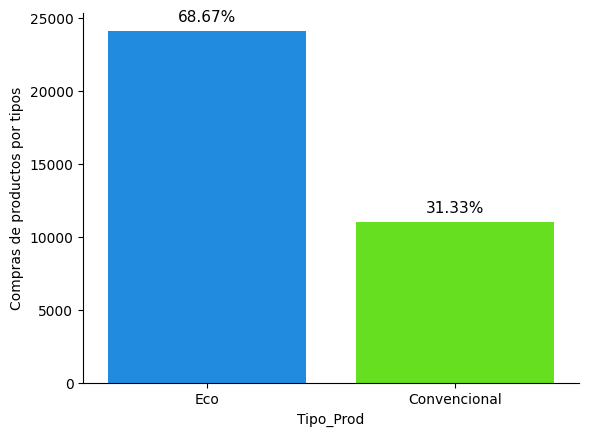

In [26]:
import seaborn as sns

ax = sns.countplot(x="Tipo_Prod",data=Osa_df, palette="gist_rainbow_r")
plt.ylabel("Compras de productos por tipos")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
for p in ax.patches:
    ax.annotate(f"{p.get_height()*100/Osa_df.shape[0]:.2f}%",(p.get_x()+p.get_width()/2,p.get_height()),
               ha="center",va="center",fontsize=11,color="black",rotation=0,xytext=(0,10),textcoords = "offset points")
plt.show()

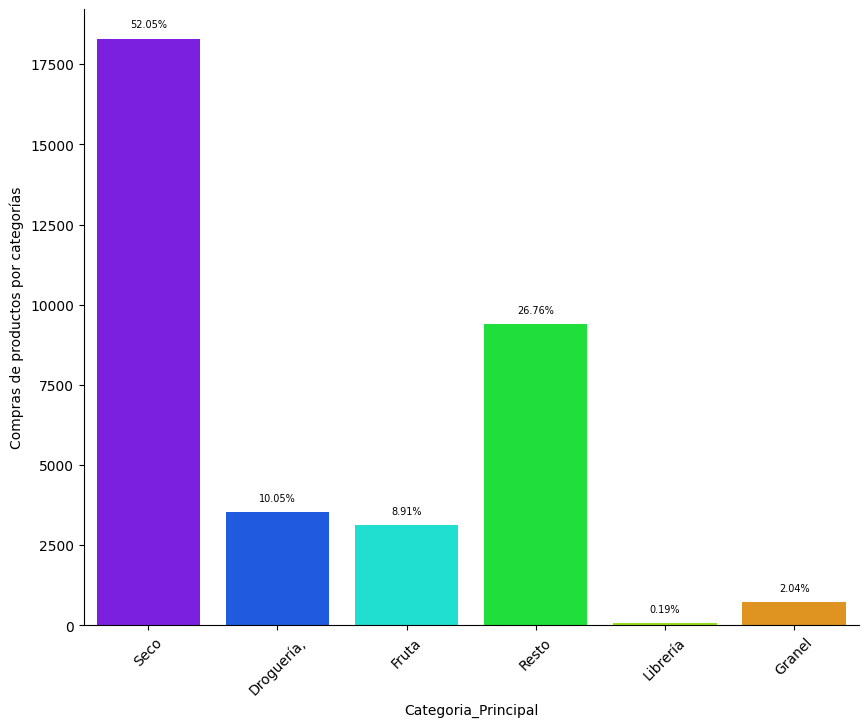

<Figure size 1000x800 with 0 Axes>

In [27]:
plt.figure(figsize=(10, 8))
ax = sns.countplot(x="Categoria_Principal",data=Osa_df, palette="gist_rainbow_r")
plt.ylabel("Compras de productos por categorías")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
for p in ax.patches:
    ax.annotate(f"{p.get_height()*100/Osa_df.shape[0]:.2f}%",(p.get_x()+p.get_width()/2,p.get_height()),
               ha="center",va="center",fontsize=7,color="black",rotation=0,xytext=(0,10),textcoords = "offset points")
plt.xticks(rotation=45)
plt.figure(figsize=(10, 8))
plt.show()

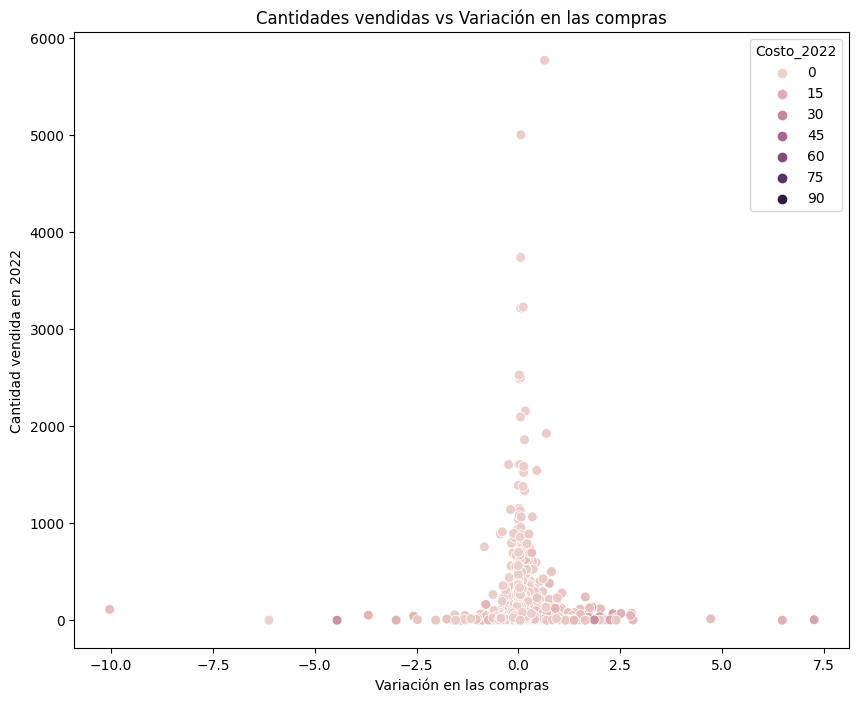

In [28]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=Osa_Compras_Vs_Cv , x='variacion_compras', y='Cant_V_2022', hue='Costo_2022', s=50)

# Agregar títulos y etiquetas a los ejes
plt.title('Cantidades vendidas vs Variación en las compras')
plt.xlabel('Variación en las compras')
plt.ylabel('Cantidad vendida en 2022')
plt.show()

In [29]:
Osa_Compras_Vs_Cv.columns.values

array(['Nombre_Prod', 'Costo_2021', 'Costo_2022', 'Cant_V_2021',
       'Cant_V_2022', 'variacion_compras', 'Delta_Compras'], dtype=object)

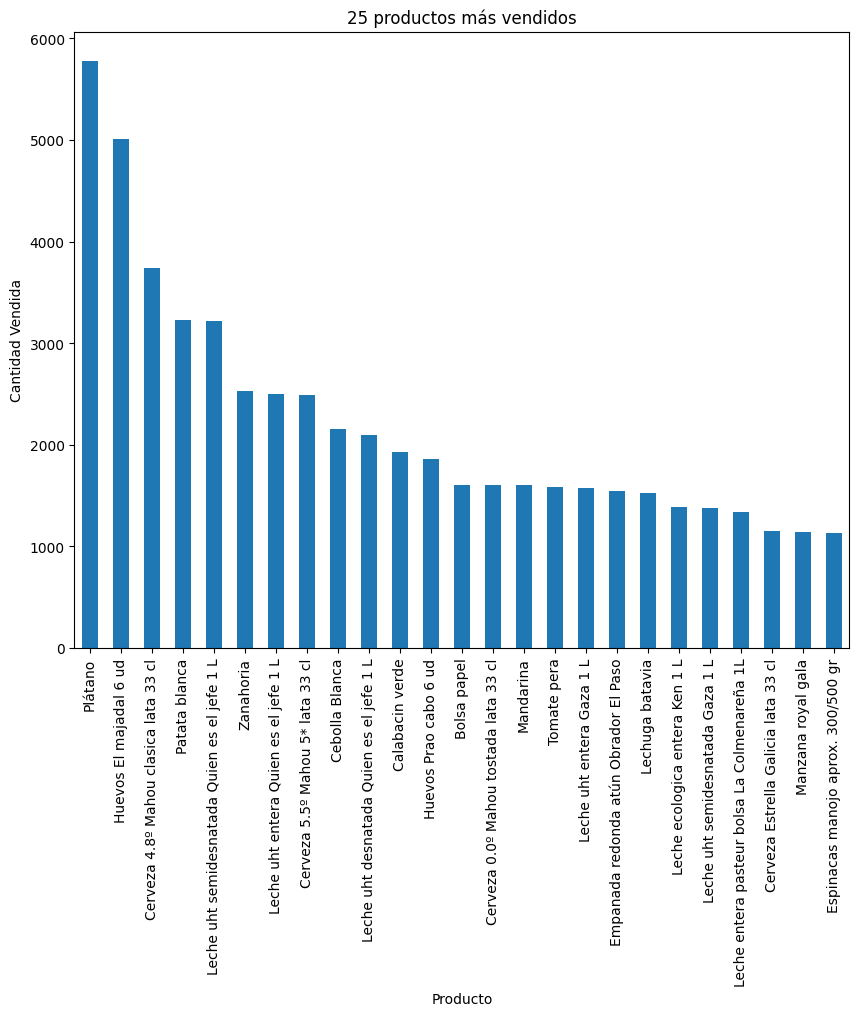

In [30]:
plt.figure(figsize=(10, 8))
ventas_por_producto = Osa_Compras_Vs_Cv.groupby(['Nombre_Prod'])['Cant_V_2022'].sum()
ventas_por_producto = ventas_por_producto.sort_values(ascending=False)
productos_mas_vendidos = ventas_por_producto.head(25)

productos_mas_vendidos.plot(kind='bar')
plt.xlabel('Producto')
plt.ylabel('Cantidad Vendida')
plt.title('25 productos más vendidos')
plt.show()

In [31]:
productos_mas_vendidos

Nombre_Prod
Plátano                                         5774.456
Huevos El majadal 6 ud                          5006.000
Cerveza 4.8º Mahou clasica lata 33 cl           3741.000
Patata blanca                                   3229.177
Leche uht semidesnatada Quien es el jefe 1 L    3220.000
Zanahoria                                       2528.335
Leche uht entera Quien es el jefe 1 L           2502.000
Cerveza 5.5º Mahou 5* lata 33 cl                2486.000
Cebolla Blanca                                  2157.288
Leche uht desnatada Quien es el jefe 1 L        2095.750
Calabacin verde                                 1926.267
Huevos Prao cabo 6 ud                           1861.000
Bolsa papel                                     1609.000
Cerveza 0.0º Mahou tostada lata 33 cl           1606.000
Mandarina                                       1604.259
Tomate pera                                     1585.239
Leche uht entera Gaza 1 L                       1574.000
Empanada redonda at

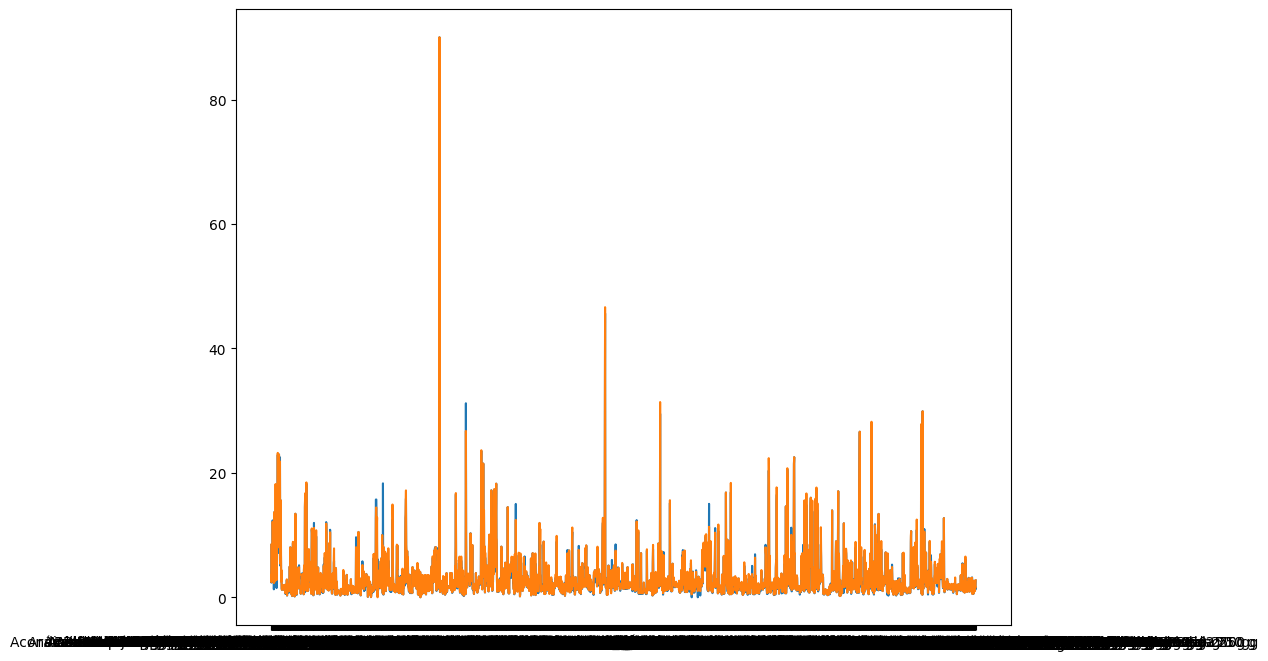

In [32]:
plt.figure(figsize=(10, 8))
plt.plot(Osa_Compras_Vs_Cv['Nombre_Prod'], Osa_Compras_Vs_Cv['Costo_2021'])
plt.plot(Osa_Compras_Vs_Cv['Nombre_Prod'], Osa_Compras_Vs_Cv['Costo_2022'])
plt.show()

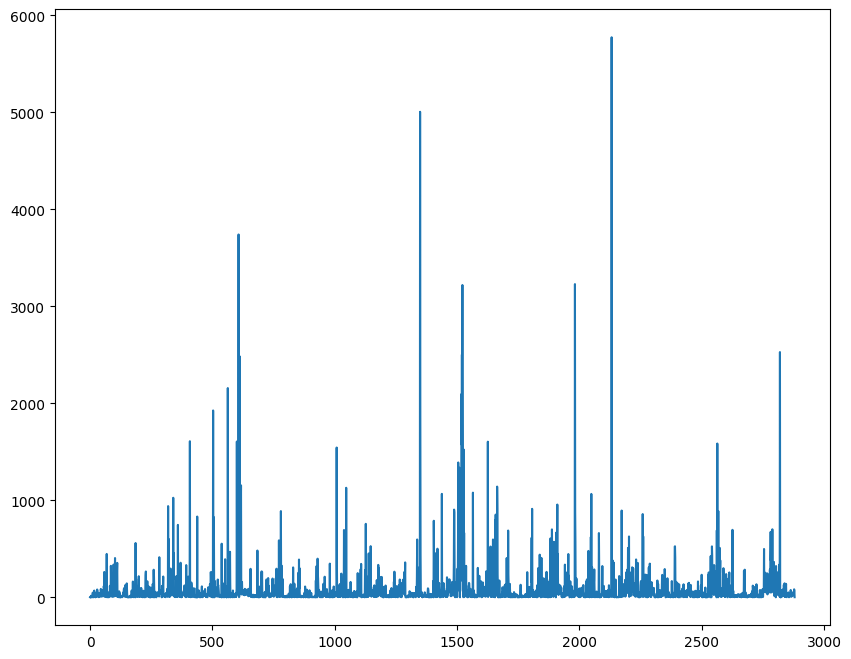

In [33]:
plt.figure(figsize=(10, 8))
x = Osa_Compras_Vs_Cv['Nombre_Prod']
y = Osa_Compras_Vs_Cv['Cant_V_2022'] 
y.plot(x=x)
plt.show()

### Visualización por categoría general y primera subcategoría de productos

In [34]:
#### VAMOS A UTILIZAR EL DATAFRAME df_catego_subcatego PARA ANALIZAR POR CATEGORIAS Y SUBCATEGORÍAS
df_catego_subcatego

,Id_Prod_2,Año_Compra,Mes_Compra,Costo_Compra,Fecha,Nombre_Prod,Tipo_Prod,Proveedor,Categoria_Prod,Cant_Prod_Venta,Precio_Prod,Año_Venta,Mes_Venta,Categoria_Principal
0,9,2021,1,5.43,2021-01,Aceite coco Maya gold 450 ml,Eco,(GUMENDI) GUMIEL Y MENDIA S.L.,"Seco Envasado / Aceites, aliños y condimentos ...",0.000,0.00,2021,1,Seco
1,13,2021,1,2.91,2021-01,Aceite de girasol Virgen bio Franciscanos 1 L,Eco,(PIDEBIO) PLATAFORMA IBERICA DISTRIBUCION ECOL...,"Seco Envasado / Aceites, aliños y condimentos ...",0.000,0.00,2021,1,Seco
2,18,2021,1,12.94,2021-01,Aceite oliva virgen extra Umbria Oretana 2.5 L,Eco,(LA LABRANZA TOLEDANA) LA LABRANZA TOLEDANA S.L.,"Seco Envasado / Aceites, aliños y condimentos ...",9.000,18.50,2021,1,Seco
3,20,2021,1,22.95,2021-01,Aceite oliva virgen extra Umbria oretana 5 L,Eco,(LA LABRANZA TOLEDANA) LA LABRANZA TOLEDANA S.L.,"Seco Envasado / Aceites, aliños y condimentos ...",5.000,32.75,2021,1,Seco
4,23,2021,1,15.58,2021-01,Aceite rosa mosqueta y damáscena Piel sana 50 ml,Eco,(PIELSANA) PIELSANA S.COOP.MAD.,"Droguería, Perfumería, Limpieza, Higiene, Hoga...",1.000,26.20,2021,1,"Droguería,"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35152,6502,2022,12,11.01,2022-12,Pularda deshuesada Sanchonar aprox 3 kg,Convencional,(SANCHONAR) SANCHONAR S.L.,Resto Producto Fresco / Carnes frescas / Aves,7.095,15.10,2022,12,Resto
35153,6508,2022,12,13.96,2022-12,Pack Veer 8 botellas 33cl,Eco,(VEER) MISSON S.COOP.CYL.,"Seco Envasado / Vinos, cervezas, sidras / Cerv...",1.000,21.95,2022,12,Seco
35154,6511,2022,12,2.23,2022-12,Láminas lasagña de sémola Castagno 500 g,Eco,(GUMENDI) GUMIEL Y MENDIA S.L.,"Seco Envasado / Arroces, pastas, sémolas y leg...",2.000,3.35,2022,12,Seco
35155,6515,2022,12,2.06,2022-12,Yogur de avena natural Alpro 500 gr,Convencional,"(GM FOOD) TRANSGOURMET IBERICA, S.A.U.","Resto Producto Fresco / Leche, zumos, producto...",1.000,2.85,2022,12,Resto


In [35]:
# dividir la columna 'Categoria_Prod' en tres subcategorías: Categoria_general, Subcategoria_1 Y Subcategoria_2
df_catego_subcatego[['Categoria_general', 'Subcategoria_1', 'Subcategoria_2']] = df_catego_subcatego['Categoria_Prod'].str.split(' / ', expand=True)

In [36]:
df_catego_subcatego 

,Id_Prod_2,Año_Compra,Mes_Compra,Costo_Compra,Fecha,Nombre_Prod,Tipo_Prod,Proveedor,Categoria_Prod,Cant_Prod_Venta,Precio_Prod,Año_Venta,Mes_Venta,Categoria_Principal,Categoria_general,Subcategoria_1,Subcategoria_2
0,9,2021,1,5.43,2021-01,Aceite coco Maya gold 450 ml,Eco,(GUMENDI) GUMIEL Y MENDIA S.L.,"Seco Envasado / Aceites, aliños y condimentos ...",0.000,0.00,2021,1,Seco,Seco Envasado,"Aceites, aliños y condimentos",Aceites
1,13,2021,1,2.91,2021-01,Aceite de girasol Virgen bio Franciscanos 1 L,Eco,(PIDEBIO) PLATAFORMA IBERICA DISTRIBUCION ECOL...,"Seco Envasado / Aceites, aliños y condimentos ...",0.000,0.00,2021,1,Seco,Seco Envasado,"Aceites, aliños y condimentos",Aceites
2,18,2021,1,12.94,2021-01,Aceite oliva virgen extra Umbria Oretana 2.5 L,Eco,(LA LABRANZA TOLEDANA) LA LABRANZA TOLEDANA S.L.,"Seco Envasado / Aceites, aliños y condimentos ...",9.000,18.50,2021,1,Seco,Seco Envasado,"Aceites, aliños y condimentos",Aceites
3,20,2021,1,22.95,2021-01,Aceite oliva virgen extra Umbria oretana 5 L,Eco,(LA LABRANZA TOLEDANA) LA LABRANZA TOLEDANA S.L.,"Seco Envasado / Aceites, aliños y condimentos ...",5.000,32.75,2021,1,Seco,Seco Envasado,"Aceites, aliños y condimentos",Aceites
4,23,2021,1,15.58,2021-01,Aceite rosa mosqueta y damáscena Piel sana 50 ml,Eco,(PIELSANA) PIELSANA S.COOP.MAD.,"Droguería, Perfumería, Limpieza, Higiene, Hoga...",1.000,26.20,2021,1,"Droguería,","Droguería, Perfumería, Limpieza, Higiene, Hogar",Parafarmacia y cosmética,Cuidado de la piel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35152,6502,2022,12,11.01,2022-12,Pularda deshuesada Sanchonar aprox 3 kg,Convencional,(SANCHONAR) SANCHONAR S.L.,Resto Producto Fresco / Carnes frescas / Aves,7.095,15.10,2022,12,Resto,Resto Producto Fresco,Carnes frescas,Aves
35153,6508,2022,12,13.96,2022-12,Pack Veer 8 botellas 33cl,Eco,(VEER) MISSON S.COOP.CYL.,"Seco Envasado / Vinos, cervezas, sidras / Cerv...",1.000,21.95,2022,12,Seco,Seco Envasado,"Vinos, cervezas, sidras",Cervezas
35154,6511,2022,12,2.23,2022-12,Láminas lasagña de sémola Castagno 500 g,Eco,(GUMENDI) GUMIEL Y MENDIA S.L.,"Seco Envasado / Arroces, pastas, sémolas y leg...",2.000,3.35,2022,12,Seco,Seco Envasado,"Arroces, pastas, sémolas y legumbres",Pastas y sémolas
35155,6515,2022,12,2.06,2022-12,Yogur de avena natural Alpro 500 gr,Convencional,"(GM FOOD) TRANSGOURMET IBERICA, S.A.U.","Resto Producto Fresco / Leche, zumos, producto...",1.000,2.85,2022,12,Resto,Resto Producto Fresco,"Leche, zumos, productos lácteos",Yogur y postre vegetal


In [37]:
cantidad_categorias_generales = df_catego_subcatego['Categoria_general'].nunique()
cantidad_subcategorias_1 = df_catego_subcatego['Subcategoria_1'].nunique()
cantidad_subcategorias_2 = df_catego_subcatego['Subcategoria_2'].nunique()

In [38]:
cantidad_categorias_generales

6

In [39]:
cantidad_subcategorias_1

46

In [40]:
cantidad_subcategorias_2

106

In [41]:
# Conclusión:
# -  Al estructurar el dataframe en Categoría_general, Subcategoría_1 y Subcategoría_2, se tiene una frecuencia de valores únicos:
#    Cantidad de categorias generales = 6
#    Cantidad de subcategorias 1 = 46
#    Cantidad de subcategorias 2 = 106
# - Esta reestructuración permitirá tener un mapeo resumido de la frecuencia de compras e ventas.

In [43]:
df_catego_subcatego['Categoria_general'].value_counts()

Seco Envasado                                      18300
Resto Producto Fresco                               9408
Droguería, Perfumería, Limpieza, Higiene, Hogar     3532
Fruta y Verdura                                     3132
Granel                                               717
Librería                                              68
Name: Categoria_general, dtype: int64

In [42]:
df_catego_subcatego['Subcategoria_1'].value_counts()

Leche, zumos, productos lácteos                            2977
Desayunos y merienda                                       2048
Zumos, leche y bebidas vegetales                           1703
Dulces y repostería                                        1674
Caldo, cremas, plato preparado, conserva                   1604
Encurtidos y aperitivos                                    1595
Quesos                                                     1561
Verdura                                                    1556
Higiene                                                    1382
Arroces, pastas, sémolas y legumbres                       1357
Vinos, cervezas, sidras                                    1332
Panes, harinas                                             1325
Aceites, aliños y condimentos                              1270
Conserva vegetal                                           1212
Carnes frescas                                             1112
Droguería                               

In [44]:
df_catego_subcatego['Subcategoria_2'].value_counts()

Yogures y postres             2108
Verdura de cocinar            1256
Conserva vegetal              1212
Otros                         1191
Panes industriales            1080
                              ... 
Preparaciones medicinales        6
Insecticidas                     5
Higiene – Higiene corporal       4
Infusiones                       3
Otras frutas                     2
Name: Subcategoria_2, Length: 106, dtype: int64

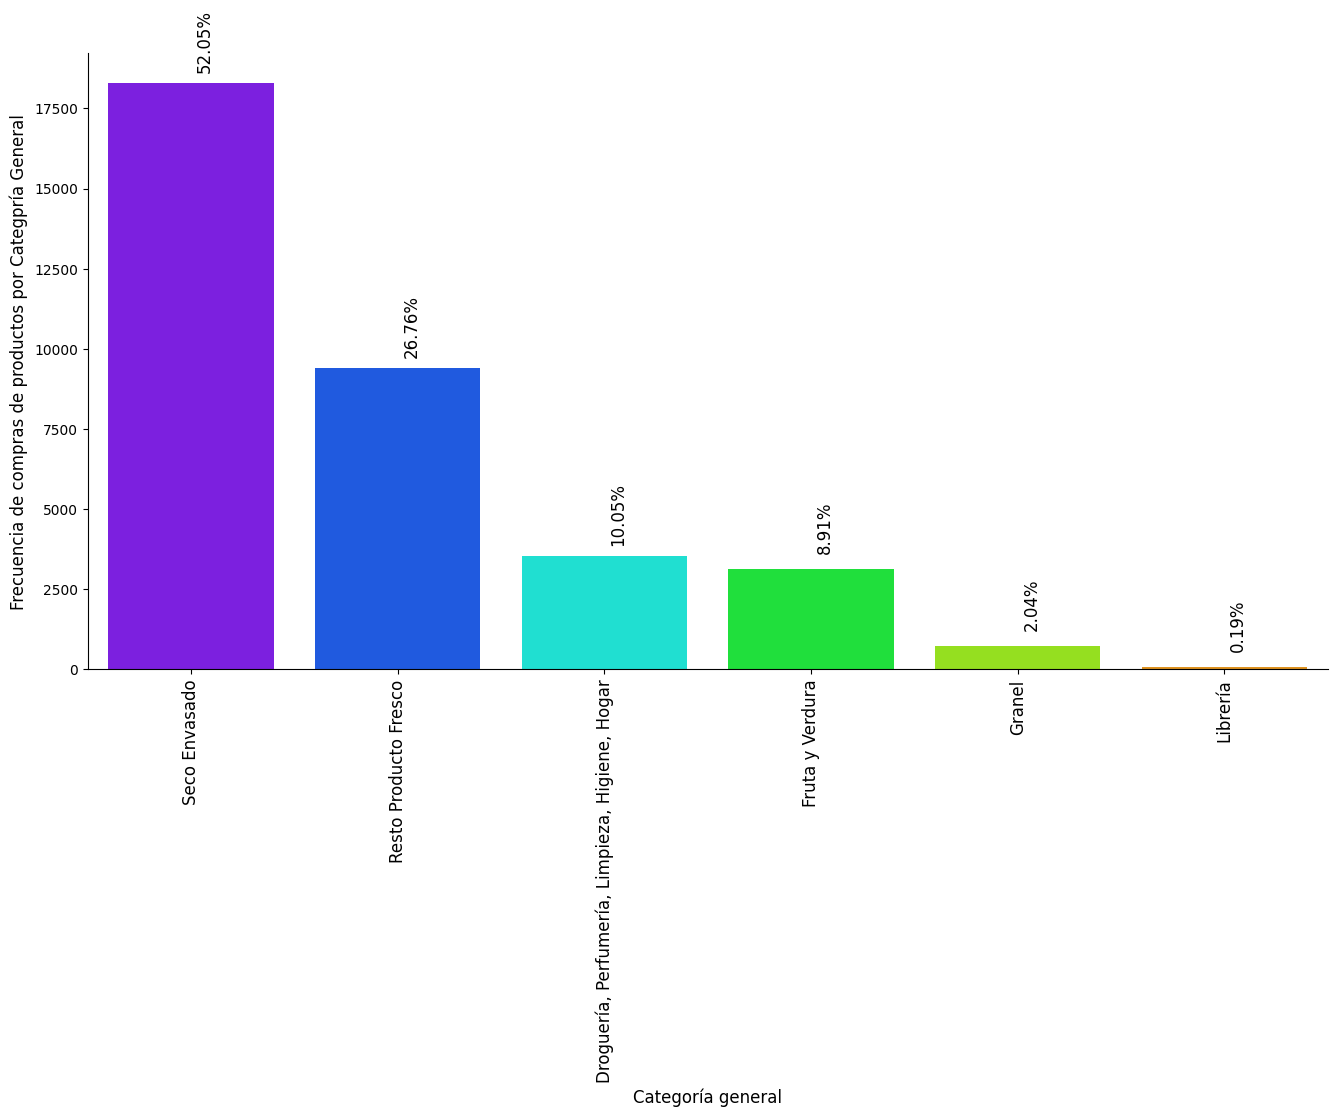

In [45]:
# Obtener la frecuencia de compra en base a la Categpría general y ordenarlo en forma descendente

counts = df_catego_subcatego['Categoria_general'].value_counts(ascending=False)
ordered_categories = counts.index.tolist()

# Graficamos la frecuencia de compra en función a Categoria_general del dataframe df_catego_subcatego
plt.figure(figsize=(16, 8)) # especificamos un tamaño de 12 pulgadas de ancho por 6 de alto
ax = sns.countplot(x="Categoria_general", data=df_catego_subcatego, palette="gist_rainbow_r",  order=ordered_categories )
plt.ylabel("Frecuencia de compras de productos por Categpría General",  fontsize=12) # reducimos el tamaño de fuente de la etiqueta del eje Y
plt.xlabel("Categoría general",  fontsize=12) 
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=12)

for p in ax.patches:
    ax.annotate(f"{p.get_height()*100/df_catego_subcatego.shape[0]:.2f}%",(p.get_x()+p.get_width()/2,p.get_height()),
               ha="center",va="center",fontsize=12,color="black",rotation=90,xytext=(10,30),textcoords = "offset points") # reducimos el tamaño de fuente de la anotación del porcentaje
plt.show()

In [46]:
# Conclusión.
# - La categoría con mayor frecuencia de compra es el Seco Envasado, representa un 52.05%, y la categoría con menor frecuencia de compra son los productos de Librería, con un 0.19 %.

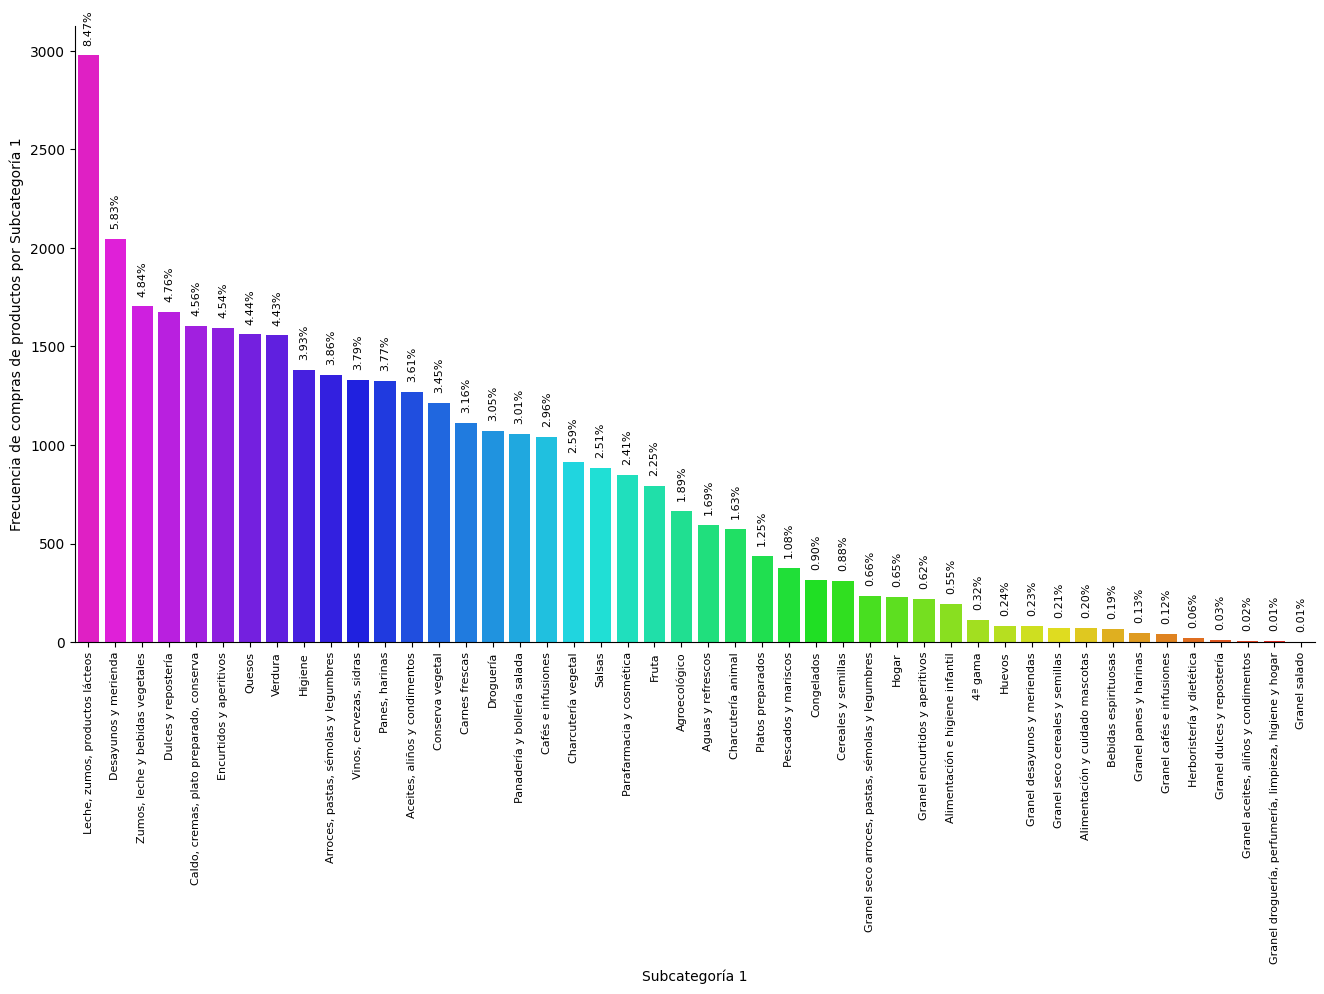

In [47]:
# Obtener la frecuencia de compra en base a la Subcategpría 1 y ordenarlo en forma descendente

counts = df_catego_subcatego['Subcategoria_1'].value_counts(ascending=False)
ordered_categories = counts.index.tolist()

# Graficamos la frecuencia de compra en función a Subcategoria_2 del dataframe df_catego_subcatego
plt.figure(figsize=(16, 8)) # especificamos un tamaño de 12 pulgadas de ancho por 6 de alto
ax = sns.countplot(x="Subcategoria_1", data=df_catego_subcatego, palette="gist_rainbow_r",  order=ordered_categories )
plt.ylabel("Frecuencia de compras de productos por Subcategoría 1",  fontsize=10) # reducimos el tamaño de fuente de la etiqueta del eje Y
plt.xlabel("Subcategoría 1",  fontsize=10) 
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=8)

for p in ax.patches:
    ax.annotate(f"{p.get_height()*100/df_catego_subcatego.shape[0]:.2f}%",(p.get_x()+p.get_width()/2,p.get_height()),
               ha="center",va="center",fontsize=8,color="black",rotation=90,xytext=(0,20),textcoords = "offset points") # reducimos el tamaño de fuente de la anotación del porcentaje
plt.show()

In [48]:
# Conclusión.
# - La Subcategpría 1 con mayor frecuencia de compra es la "Leche, zumos, productos lácteso", representa un 8.47 %, y la categoría con menor frecuencia de compra son los productos a Granel salado, con un 0.01 %.

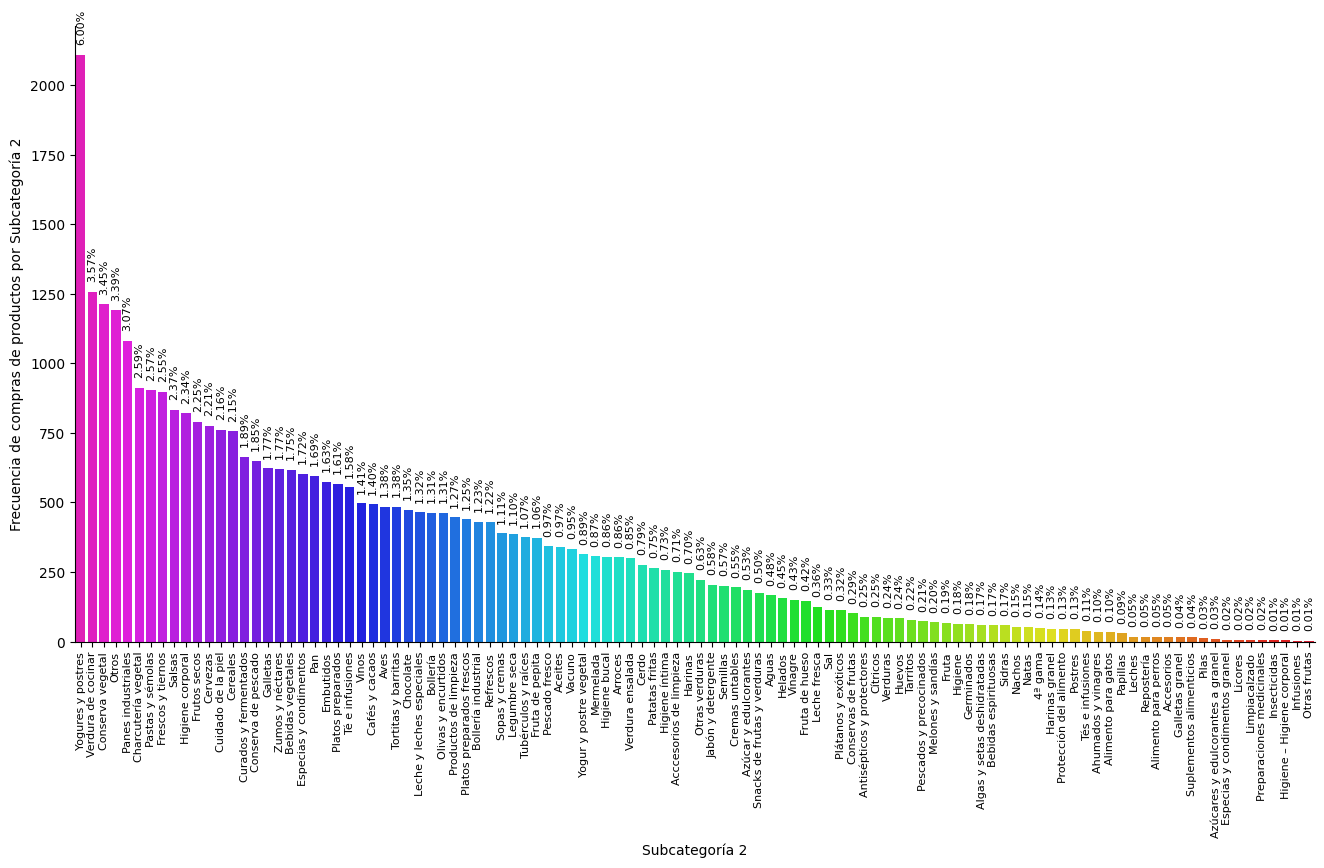

In [49]:
# Obtener la frecuencia de compra en base a la Subcategpría 2 y ordenarlo en forma descendente

counts = df_catego_subcatego['Subcategoria_2'].value_counts(ascending=False)
ordered_categories = counts.index.tolist()

# Graficamos la frecuencia de compra en función a Subcategoria_2 del dataframe df_catego_subcatego
plt.figure(figsize=(16, 8)) # especificamos un tamaño de 12 pulgadas de ancho por 6 de alto
ax = sns.countplot(x="Subcategoria_2", data=df_catego_subcatego, palette="gist_rainbow_r",  order=ordered_categories )
plt.ylabel("Frecuencia de compras de productos por Subcategoría 2",  fontsize=10) # reducimos el tamaño de fuente de la etiqueta del eje Y
plt.xlabel("Subcategoría 2",  fontsize=10) 
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=8)

for p in ax.patches:
    ax.annotate(f"{p.get_height()*100/df_catego_subcatego.shape[0]:.2f}%",(p.get_x()+p.get_width()/2,p.get_height()),
               ha="center",va="center",fontsize=8,color="black",rotation=90,xytext=(0,20),textcoords = "offset points") # reducimos el tamaño de fuente de la anotación del porcentaje
plt.show()

In [50]:
# Conclusión.
# - La Subcategpría 2 con mayor frecuencia de compra son los "Yogures y postres", representa un 6.00 %, y la categoría con menor frecuencia de compra corresponde a la tipología Otras frutas, con un 0.01 %.